# Checking Video Speed-Up Factor
This notebook will help you determine how much faster the video `videoplayback.mp4` is compared to real time. 

- We will extract the video's duration using Python.
- If you know the real-world duration the video represents, you can calculate the speed-up factor as:

```
speed_up_factor = real_duration_seconds / video_duration_seconds
```

- A value greater than 1 means the video is sped up.
- Please provide the real-world duration (in seconds, minutes, or hours) for accurate calculation.

In [2]:
%pip install moviepy 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install opencv-python


In [5]:
import cv2

video_path = 'videoplayback.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print('Error: Cannot open video file.')
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    video_duration = frame_count / fps if fps > 0 else 0
    print(f"Video duration: {video_duration:.2f} seconds (Frames: {frame_count}, FPS: {fps})")
    
    # Enter the real-world duration (in seconds) that the video represents
    try:
        real_duration = float(input("Enter the real-world duration in seconds: "))
        speed_up_factor = real_duration / video_duration if video_duration > 0 else 0
        print(f"Speed-up factor: {speed_up_factor:.2f}x")
        if speed_up_factor > 1:
            print(f"The video is sped up by a factor of {speed_up_factor:.2f}.")
        elif speed_up_factor < 1:
            print(f"The video is slower than real time by a factor of {1/speed_up_factor:.2f}.")
        else:
            print("The video plays at real time speed.")
    except Exception as e:
        print("Invalid input for real-world duration.")
    cap.release()

Video duration: 157.06 seconds (Frames: 4707.0, FPS: 29.97002997002997)
Speed-up factor: 1.91x
The video is sped up by a factor of 1.91.


In [6]:

import cv2

video_path = 'videoplayback.mp4'
output_path = 'videoplayback_normal_speed.mp4'

try:
    speed_up_factor = speed_up_factor
    if speed_up_factor <= 0:
        print("Speed-up factor must be greater than zero.")
    else:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print('Error: Cannot open video file.')
        else:
            fps = cap.get(cv2.CAP_PROP_FPS)
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps / speed_up_factor, (width, height))
            
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                out.write(frame)
            cap.release()
            out.release()
            print(f"Saved video at normal speed as {output_path} (FPS: {fps/speed_up_factor:.2f}).")
except Exception as e:
    print("Invalid input for speed-up factor.")


Saved video at normal speed as videoplayback_normal_speed.mp4 (FPS: 15.69).


In [ ]:

import cv2
import os

video_path = 'videoplayback_normal_speed.mp4'
output_dir = 'frames'
interval = 0.5  # seconds
total_time = 300.0  # seconds

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print('Error: Cannot open video file.')
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    for t in [round(x * interval, 2) for x in range(1, int(total_time / interval) + 1)]:
        frame_number = int(t * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        if ret:
            frame_filename = os.path.join(output_dir, f'frame_{t:.1f}s.jpg')
            cv2.imwrite(frame_filename, frame)
            print(f'Saved {frame_filename}')
        else:
            print(f'Could not extract frame at {t:.1f}s')
    cap.release()


In [2]:

import cv2
import os

video_path = 'videoplayback_normal_speed.mp4'
output_dir = 'FRAME'
interval = 0.5  # seconds
start_time = 15.0  # seconds

abs_output_dir = os.path.abspath(output_dir)
print(f"Frames will be saved in: {abs_output_dir}")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print('Error: Cannot open video file.')
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    video_duration = frame_count / fps if fps > 0 else 0
    t = start_time
    while t <= video_duration:
        frame_number = int(t * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        if ret:
            frame_filename = os.path.join(output_dir, f'frame_{t:.1f}s.jpg')
            cv2.imwrite(frame_filename, frame)
            print(f'Saved {frame_filename}')
        else:
            print(f'Could not extract frame at {t:.1f}s')
        t += interval
    cap.release()


Frames will be saved in: c:\Users\lenovo\Desktop\initial\FRAME
Saved FRAME\frame_15.0s.jpg
Saved FRAME\frame_15.5s.jpg
Saved FRAME\frame_16.0s.jpg
Saved FRAME\frame_16.5s.jpg
Saved FRAME\frame_17.0s.jpg
Saved FRAME\frame_17.5s.jpg
Saved FRAME\frame_18.0s.jpg
Saved FRAME\frame_18.5s.jpg
Saved FRAME\frame_19.0s.jpg
Saved FRAME\frame_19.5s.jpg
Saved FRAME\frame_20.0s.jpg
Saved FRAME\frame_20.5s.jpg
Saved FRAME\frame_21.0s.jpg
Saved FRAME\frame_21.5s.jpg
Saved FRAME\frame_22.0s.jpg
Saved FRAME\frame_22.5s.jpg
Saved FRAME\frame_23.0s.jpg
Saved FRAME\frame_23.5s.jpg
Saved FRAME\frame_24.0s.jpg
Saved FRAME\frame_24.5s.jpg
Saved FRAME\frame_25.0s.jpg
Saved FRAME\frame_25.5s.jpg
Saved FRAME\frame_26.0s.jpg
Saved FRAME\frame_26.5s.jpg
Saved FRAME\frame_27.0s.jpg
Saved FRAME\frame_27.5s.jpg
Saved FRAME\frame_28.0s.jpg
Saved FRAME\frame_28.5s.jpg
Saved FRAME\frame_29.0s.jpg
Saved FRAME\frame_29.5s.jpg
Saved FRAME\frame_30.0s.jpg
Saved FRAME\frame_30.5s.jpg
Saved FRAME\frame_31.0s.jpg
Saved FRAME\f

In [3]:
total_time=299.5-15 

In [4]:
%pip install torch torchvision pandas

                                              0.0/1.7 MB ? eta -:--:--
     --------                                 0.3/1.7 MB 10.9 MB/s eta 0:00:01
     ---------------------                    0.9/1.7 MB 11.6 MB/s eta 0:00:01
     ----------------------------------       1.5/1.7 MB 11.6 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:

import cv2
import os
import glob
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as T
from torchvision.models import resnet18

# CNN model setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet18(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval().to(device)
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_features(img):
    # CNN embedding
    img_t = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = resnet(img_t).cpu().numpy().flatten()
    # Color histogram (RGB, 32 bins each)
    hist = []
    for i in range(3):
        h = cv2.calcHist([img], [i], None, [32], [0, 256]).flatten()
        h = h / h.sum()
        hist.extend(h)
    # Edge/texture (Sobel)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edge_mean = np.mean(np.abs(sobelx)) + np.mean(np.abs(sobely))
    return embedding, hist, edge_mean

frame_dir = 'FRAME'
frame_files = sorted(glob.glob(os.path.join(frame_dir, 'frame_*.jpg')), key=lambda x: float(os.path.basename(x).split('_')[1][:-5]))
total_time = 299.5 - 15  # seconds

data = []
for frame_path in frame_files:
    basename = os.path.basename(frame_path)
    # Extract time from filename (e.g., frame_17.0s.jpg)
    time_frame = float(basename.split('_')[1][:-5])
    if time_frame < 15:
        continue  # skip frames before 15s
    rel_time = time_frame - 15
    time_remaining = total_time - rel_time
    img = cv2.imread(frame_path)
    embedding, hist, edge_mean = extract_features(img)
    row = {
        'framename': basename,
        'time_frame': rel_time,
        'time_remaining': time_remaining,
        'cnn_embedding': embedding.tolist(),
        'hist_rgb': hist,
        'edge_texture': edge_mean
    }
    data.append(row)

df = pd.DataFrame(data)
df.to_csv('df.csv', index=False)
df.head()



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546


In [13]:
len(df['hist_rgb'][0])

96

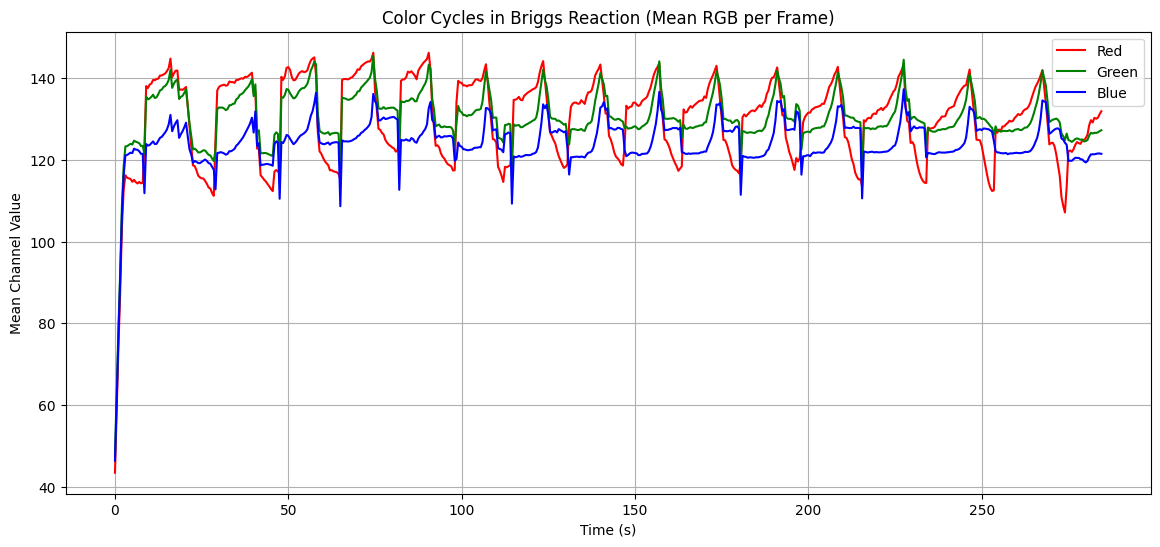

In [15]:
import matplotlib.pyplot as plt
import numpy as np
rgb_means = []
for h in df['hist_rgb']:
    # Each channel has 32 bins, so sum weighted by bin center
    bins = np.arange(32) * (256/32) + (256/32)/2
    r_mean = np.sum(h[0:32] * bins) / np.sum(h[0:32])
    g_mean = np.sum(h[32:64] * bins) / np.sum(h[32:64])
    b_mean = np.sum(h[64:96] * bins) / np.sum(h[64:96])
    rgb_means.append([r_mean, g_mean, b_mean])
rgb_means = np.array(rgb_means)
df['r_mean'] = rgb_means[:,0]
df['g_mean'] = rgb_means[:,1]
df['b_mean'] = rgb_means[:,2]

# Plot mean RGB values over time to visualize cycles
plt.figure(figsize=(14,6))
plt.plot(df['time_frame'], df['r_mean'], label='Red', color='red')
plt.plot(df['time_frame'], df['g_mean'], label='Green', color='green')
plt.plot(df['time_frame'], df['b_mean'], label='Blue', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Mean Channel Value')
plt.title('Color Cycles in Briggs Reaction (Mean RGB per Frame)')
plt.legend()
plt.grid(True)
plt.show()

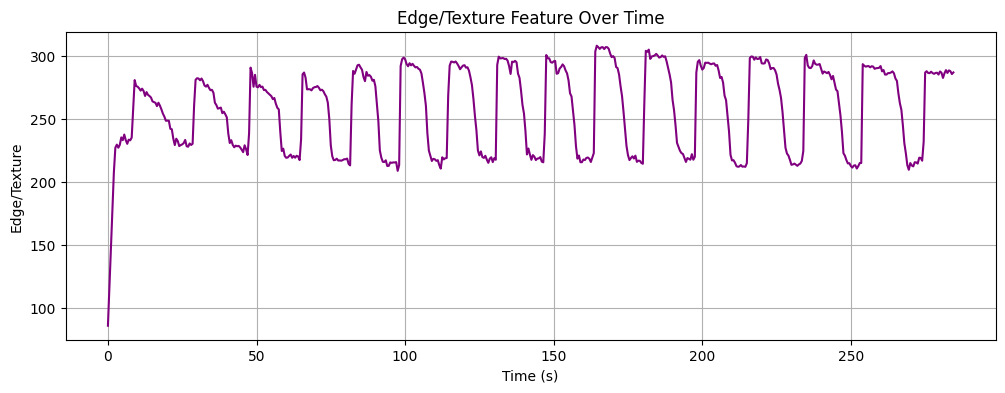

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df['time_frame'], df['edge_texture'], color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Edge/Texture')
plt.title('Edge/Texture Feature Over Time')
plt.grid(True)
plt.show()

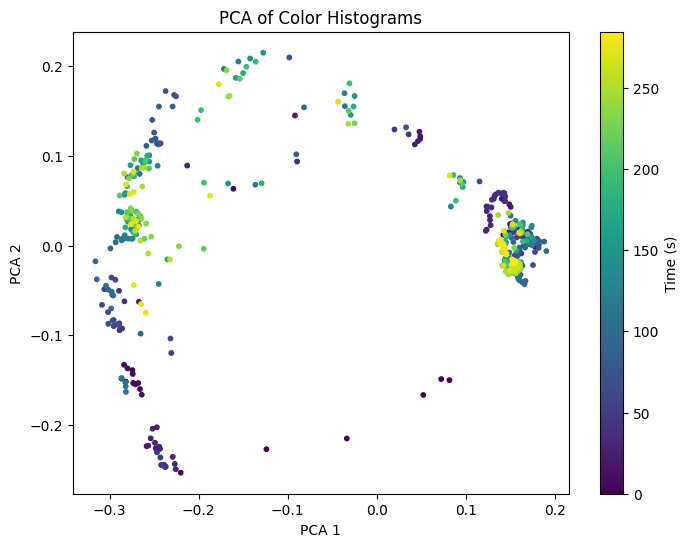

In [17]:
from sklearn.decomposition import PCA
hist_matrix = np.stack(df['hist_rgb'].apply(lambda x: np.array(x)))
pca = PCA(n_components=2)
hist_pca = pca.fit_transform(hist_matrix)
plt.figure(figsize=(8,6))
plt.scatter(hist_pca[:,0], hist_pca[:,1], c=df['time_frame'], cmap='viridis', s=10)
plt.colorbar(label='Time (s)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Color Histograms')
plt.show()

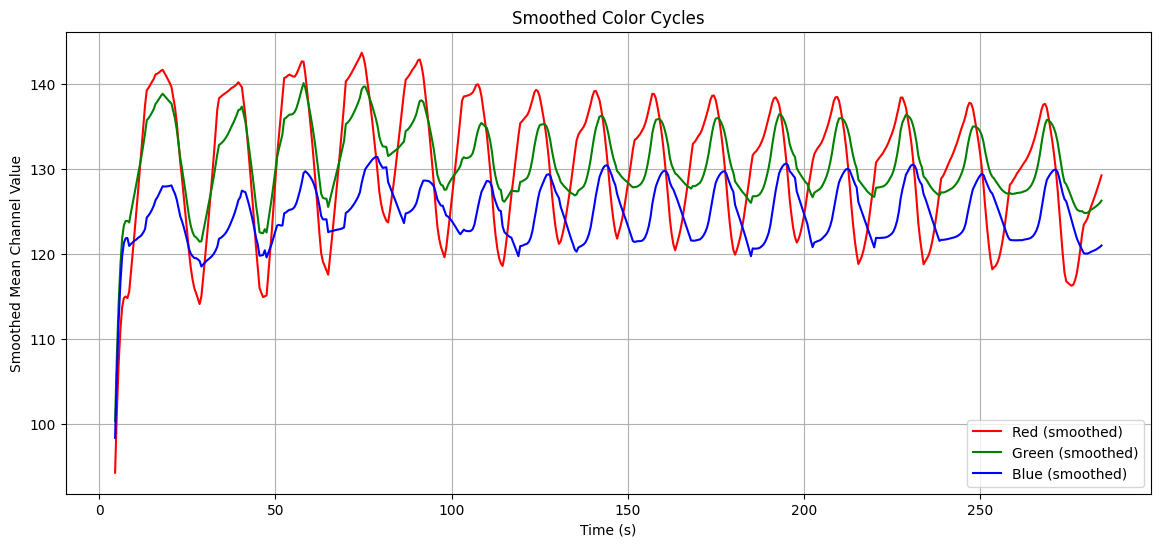

In [18]:
window = 10
plt.figure(figsize=(14,6))
plt.plot(df['time_frame'], df['r_mean'].rolling(window).mean(), label='Red (smoothed)', color='red')
plt.plot(df['time_frame'], df['g_mean'].rolling(window).mean(), label='Green (smoothed)', color='green')
plt.plot(df['time_frame'], df['b_mean'].rolling(window).mean(), label='Blue (smoothed)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Smoothed Mean Channel Value')
plt.title('Smoothed Color Cycles')
plt.legend()
plt.grid(True)
plt.show()

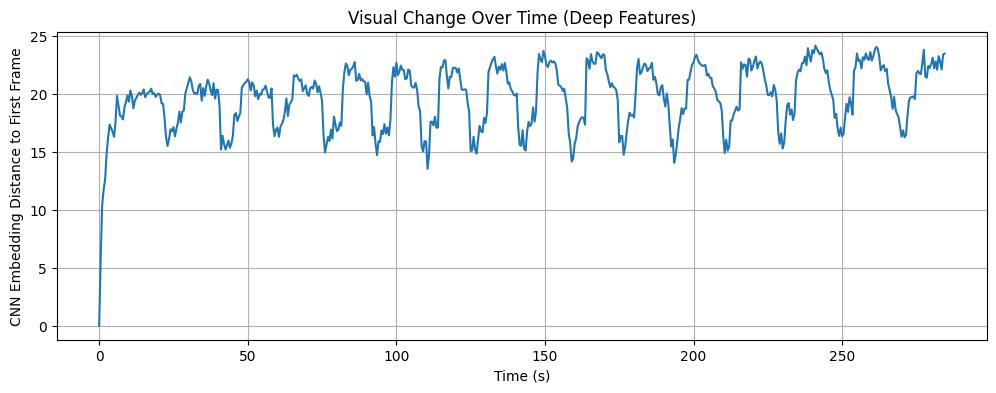

In [19]:
from scipy.spatial.distance import euclidean
cnn0 = np.array(df['cnn_embedding'][0])
cnn_dist = [euclidean(np.array(x), cnn0) for x in df['cnn_embedding']]
plt.figure(figsize=(12,4))
plt.plot(df['time_frame'], cnn_dist)
plt.xlabel('Time (s)')
plt.ylabel('CNN Embedding Distance to First Frame')
plt.title('Visual Change Over Time (Deep Features)')
plt.grid(True)
plt.show()

In [20]:
%pip install statsmodels

                                              0.0/9.9 MB ? eta -:--:--
     -                                        0.3/9.9 MB 5.4 MB/s eta 0:00:02
     ---                                      0.9/9.9 MB 9.3 MB/s eta 0:00:01
     -------                                  1.8/9.9 MB 14.7 MB/s eta 0:00:01
     -----------                              2.7/9.9 MB 14.5 MB/s eta 0:00:01
     --------------                           3.7/9.9 MB 16.7 MB/s eta 0:00:01
     -------------------                      4.7/9.9 MB 16.8 MB/s eta 0:00:01
     -----------------------                  5.8/9.9 MB 17.7 MB/s eta 0:00:01
     ----------------------------             7.0/9.9 MB 18.5 MB/s eta 0:00:01
     --------------------------------         8.1/9.9 MB 19.2 MB/s eta 0:00:01
     -------------------------------------    9.1/9.9 MB 19.4 MB/s eta 0:00:01
     ---------------------------------------  9.9/9.9 MB 19.7 MB/s eta 0:00:01
     ---------------------------------------  9.9/9.9 MB 19.7 


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


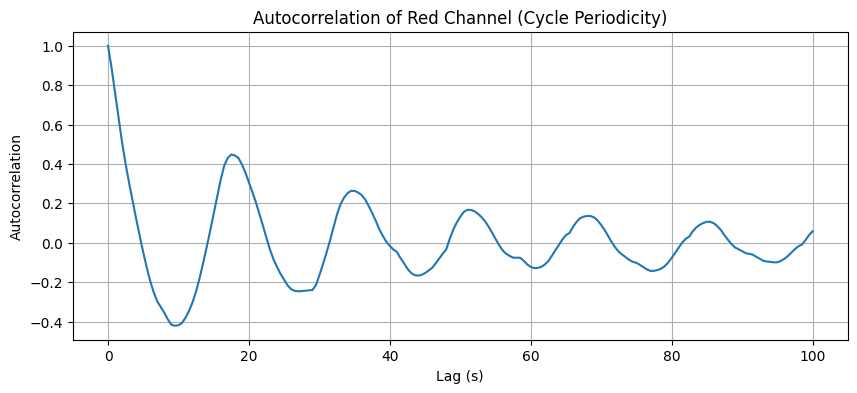

In [21]:
import numpy as np
from statsmodels.tsa.stattools import acf
plt.figure(figsize=(10,4))
autocorr = acf(df['r_mean'], nlags=200)
plt.plot(np.arange(len(autocorr))*0.5, autocorr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Red Channel (Cycle Periodicity)')
plt.grid(True)
plt.show()

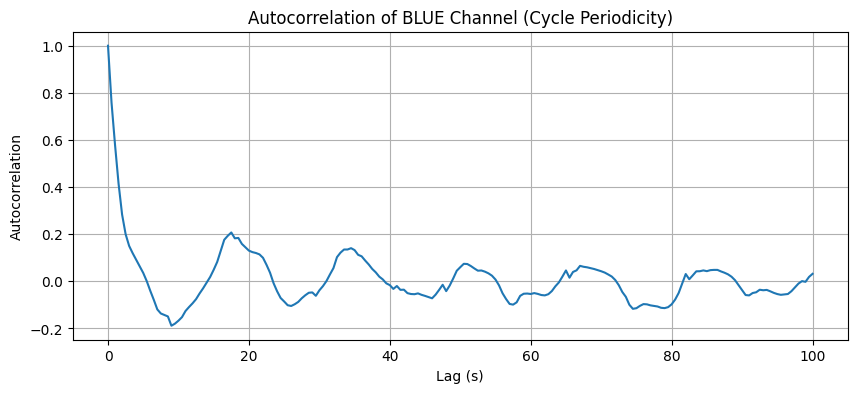

In [24]:
import numpy as np
from statsmodels.tsa.stattools import acf
plt.figure(figsize=(10,4))
autocorr = acf(df['b_mean'], nlags=200)
plt.plot(np.arange(len(autocorr))*0.5, autocorr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of BLUE Channel (Cycle Periodicity)')
plt.grid(True)
plt.show()

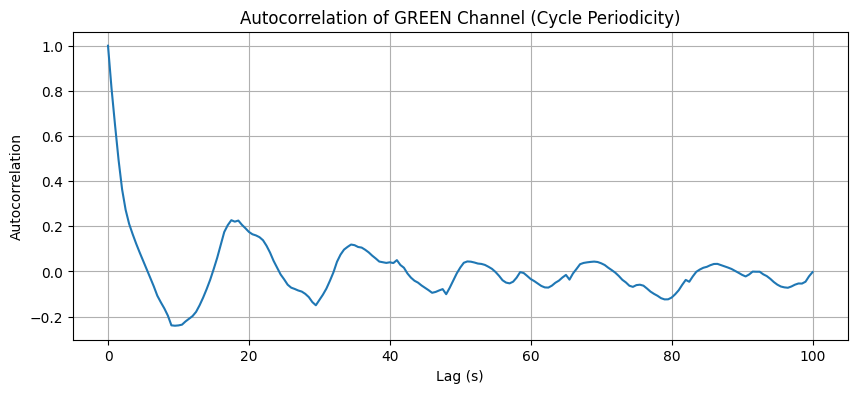

In [26]:
import numpy as np
from statsmodels.tsa.stattools import acf
plt.figure(figsize=(10,4))
autocorr = acf(df['g_mean'], nlags=200)
plt.plot(np.arange(len(autocorr))*0.5, autocorr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of GREEN Channel (Cycle Periodicity)')
plt.grid(True)
plt.show()

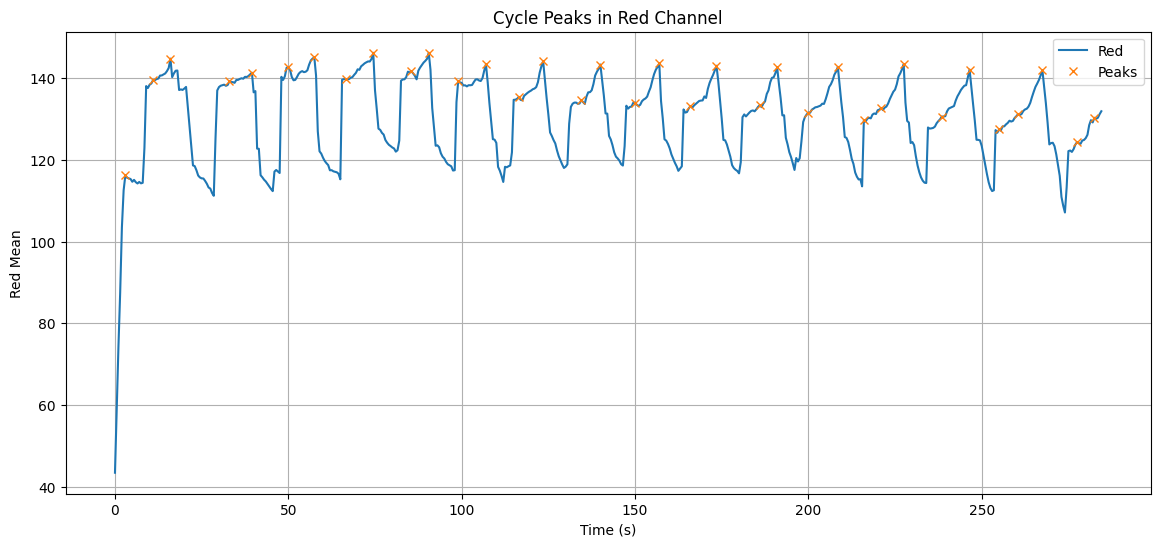

Number of cycles detected: 35


In [27]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(df['r_mean'], distance=10)
plt.figure(figsize=(14,6))
plt.plot(df['time_frame'], df['r_mean'], label='Red')
plt.plot(df['time_frame'].iloc[peaks], df['r_mean'].iloc[peaks], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Red Mean')
plt.title('Cycle Peaks in Red Channel')
plt.legend()
plt.grid(True)
plt.show()
print(f"Number of cycles detected: {len(peaks)}")

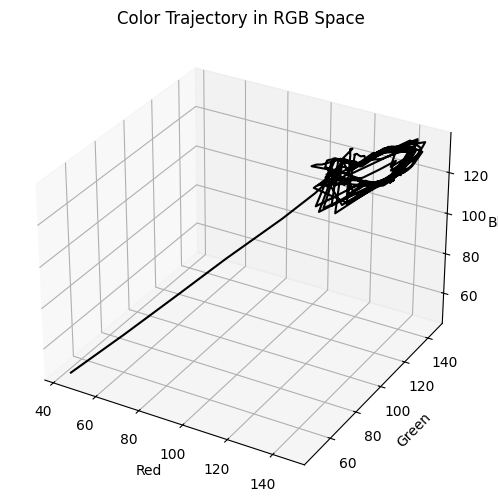

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['r_mean'], df['g_mean'], df['b_mean'], color='black')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Color Trajectory in RGB Space')
plt.show()

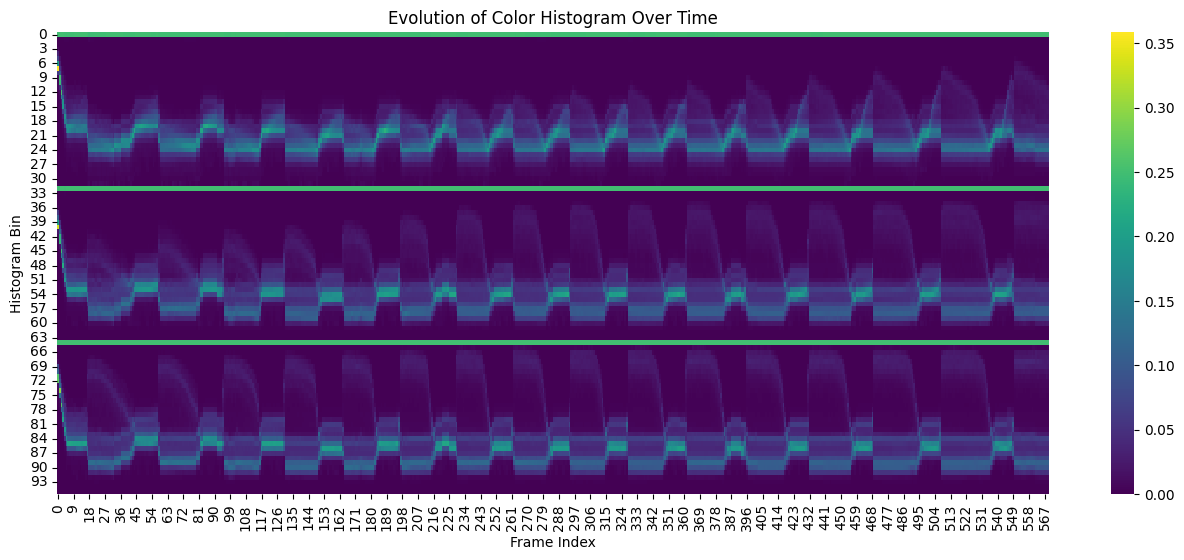

In [29]:
import seaborn as sns
hist_matrix = np.stack(df['hist_rgb'].apply(lambda x: np.array(x)))
plt.figure(figsize=(16,6))
sns.heatmap(hist_matrix.T, cmap='viridis', cbar=True)
plt.xlabel('Frame Index')
plt.ylabel('Histogram Bin')
plt.title('Evolution of Color Histogram Over Time')
plt.show()

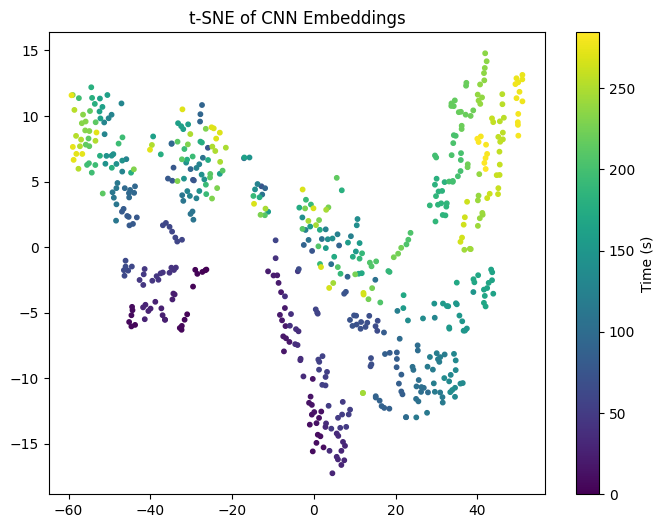

In [30]:
from sklearn.manifold import TSNE
cnn_matrix = np.stack(df['cnn_embedding'].apply(lambda x: np.array(x)))
tsne = TSNE(n_components=2, random_state=42)
cnn_tsne = tsne.fit_transform(cnn_matrix)
plt.figure(figsize=(8,6))
plt.scatter(cnn_tsne[:,0], cnn_tsne[:,1], c=df['time_frame'], cmap='viridis', s=10)
plt.colorbar(label='Time (s)')
plt.title('t-SNE of CNN Embeddings')
plt.show()

In [31]:
df

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183
...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108


In [ ]:

import numpy as np
import pandas as pd
from scipy.stats import entropy, skew

def extract_extra_hist_features(df):
    feature_list = []
    for h in df['hist_rgb']:
        h = np.array(h)
        r = h[0:32]
        g = h[32:64]
        b = h[64:96]
        # Entropy
        r_entropy = entropy(r + 1e-8)  # add small value to avoid log(0)
        g_entropy = entropy(g + 1e-8)
        b_entropy = entropy(b + 1e-8)
        # Skewness
        r_skew = skew(r)
        g_skew = skew(g)
        b_skew = skew(b)
        # Std
        r_std = np.std(r)
        g_std = np.std(g)
        b_std = np.std(b)
        # Peak bin (index of max bin)
        r_peak = np.argmax(r)
        g_peak = np.argmax(g)
        b_peak = np.argmax(b)
        feature_list.append({
            'r_entropy': r_entropy,
            'g_entropy': g_entropy,
            'b_entropy': b_entropy,
            'r_skew': r_skew,
            'g_skew': g_skew,
            'b_skew': b_skew,
            'r_std': r_std,
            'g_std': g_std,
            'b_std': b_std,
            'r_peakbin': r_peak,
            'g_peakbin': g_peak,
            'b_peakbin': b_peak
        })
    return pd.DataFrame(feature_list)

# Usage: merge with your df


,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,b_entropy,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,1.648258,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,1.811778,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,1.947967,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.058440,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.177585,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0


In [33]:
df['r_mean_diff'] = df['r_mean'].diff().fillna(0)
df['g_mean_diff'] = df['g_mean'].diff().fillna(0)
df['b_mean_diff'] = df['b_mean'].diff().fillna(0)


In [34]:
df

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,g_mean_diff,b_mean_diff
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,0.000000,0.000000
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,15.664531,14.888046
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,15.535912,15.922474
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,13.800519,13.637815
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,16.166406,15.537240
...,...,...,...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260,1.140527,0.193201,0.003333
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910,-0.249329,-0.036561,0.090650
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214,0.246484,0.138076,0.101304
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108,0.869738,0.280934,-0.010106


In [ ]:
extra_features_df = extract_extra_hist_features(df)
final_df = pd.concat([df.reset_index(drop=True), extra_features_df.reset_index(drop=True)], axis=1)
final_df.head()


In [40]:
final_df.to_csv('final_df.csv', index=False)
final_df.columns

Index(['framename', 'time_frame', 'time_remaining', 'cnn_embedding',
       'hist_rgb', 'edge_texture', 'r_mean', 'g_mean', 'b_mean', 'r_mean_diff',
       'g_mean_diff', 'b_mean_diff', 'r_entropy', 'g_entropy', 'b_entropy',
       'r_skew', 'g_skew', 'b_skew', 'r_std', 'g_std', 'b_std', 'r_peakbin',
       'g_peakbin', 'b_peakbin'],
      dtype='object')

In [43]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load the final dataframe
final_df = pd.read_csv('final_df.csv')

# Prepare features and target
cnn_dim = len(eval(final_df['cnn_embedding'][0])) if isinstance(final_df['cnn_embedding'][0], str) else len(final_df['cnn_embedding'][0])
cnn_features = final_df['cnn_embedding'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
cnn_matrix = np.stack(cnn_features.values)

feature_cols = [
    'edge_texture', 'r_mean', 'g_mean', 'b_mean', 'r_mean_diff',
    'g_mean_diff', 'b_mean_diff', 'r_entropy', 'g_entropy', 'b_entropy',
    'r_skew', 'g_skew', 'b_skew', 'r_std', 'g_std', 'b_std',
    'r_peakbin', 'g_peakbin', 'b_peakbin'
]
X_tabular = final_df[feature_cols].values
X = np.hstack([cnn_matrix, X_tabular])
y = final_df['time_remaining'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}s")
print(f"R2 Score: {r2:.3f}")


MAE: 35.88s
R2 Score: 0.651


## Linear Regression Using Only CNN Embeddings
Now we will train and evaluate a linear regression model using only the CNN embeddings as features to predict the time remaining in the Briggs-Rauscher reaction.

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataframe
# (Assume 'final_df.csv' contains a column 'cnn_embedding' with np.array or list-like values)
df = pd.read_csv('final_df.csv')

# Convert string representation of list/array to numpy array if needed
def parse_embedding(x):
    if isinstance(x, str):
        return np.array(eval(x))
    return np.array(x)

cnn_embeddings = np.vstack(df['cnn_embedding'].apply(parse_embedding).values)
y = df['time_remaining'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(cnn_embeddings, y, test_size=0.2, random_state=42)

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE (CNN embeddings only): {mae:.2f} s")
print(f"R^2 (CNN embeddings only): {r2:.3f}")

MAE (CNN embeddings only): 41.07 s
R^2 (CNN embeddings only): 0.580


## Linear Regression Using CNN Embeddings + Color Histogram Vector
Now we will train and evaluate a linear regression model using both the CNN embeddings and the full color histogram (hist_rgb) as features to predict the time remaining in the Briggs-Rauscher reaction.

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataframe
# (Assume 'final_df.csv' contains columns 'cnn_embedding' and 'hist_rgb' with np.array or list-like values)
df = pd.read_csv('final_df.csv')

def parse_array(x):
    if isinstance(x, str):
        return np.array(eval(x))
    return np.array(x)

cnn_embeddings = np.vstack(df['cnn_embedding'].apply(parse_array).values)
hist_rgb = np.vstack(df['hist_rgb'].apply(parse_array).values)
X = np.hstack([cnn_embeddings, hist_rgb])
y = df['time_remaining'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE (CNN + hist_rgb): {mae:.2f} s")
print(f"R^2 (CNN + hist_rgb): {r2:.3f}")

MAE (CNN + hist_rgb): 35.41 s
R^2 (CNN + hist_rgb): 0.709


## XGBoost Regression Using CNN Embeddings + Color Histogram Vector
Now we will train and evaluate an XGBoost regressor using both the CNN embeddings and the full color histogram (hist_rgb) as features to predict the time remaining in the Briggs-Rauscher reaction.

In [45]:
%pip install xgboost

                                              0.0/150.0 MB ? eta -:--:--
                                              0.4/150.0 MB 7.8 MB/s eta 0:00:20
                                             1.2/150.0 MB 12.6 MB/s eta 0:00:12
                                             2.2/150.0 MB 15.3 MB/s eta 0:00:10
                                             3.0/150.0 MB 15.7 MB/s eta 0:00:10
     -                                       4.0/150.0 MB 17.0 MB/s eta 0:00:09
     -                                       4.7/150.0 MB 17.6 MB/s eta 0:00:09
     -                                       5.3/150.0 MB 16.2 MB/s eta 0:00:09
     -                                       6.3/150.0 MB 16.8 MB/s eta 0:00:09
     -                                       7.1/150.0 MB 16.9 MB/s eta 0:00:09
     --                                      8.0/150.0 MB 17.1 MB/s eta 0:00:09
     --                                      8.8/150.0 MB 17.0 MB/s eta 0:00:09
     --                                      9.


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# If not installed, uncomment the next line:
# %pip install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load the dataframe
df = pd.read_csv('final_df.csv')

def parse_array(x):
    if isinstance(x, str):
        return np.array(eval(x))
    return np.array(x)

cnn_embeddings = np.vstack(df['cnn_embedding'].apply(parse_array).values)
hist_rgb = np.vstack(df['hist_rgb'].apply(parse_array).values)
X = np.hstack([cnn_embeddings, hist_rgb])
y = df['time_remaining'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost regressor
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE (XGBoost, CNN + hist_rgb): {mae:.2f} s")
print(f"R^2 (XGBoost, CNN + hist_rgb): {r2:.3f}")

MAE (XGBoost, CNN + hist_rgb): 15.88 s
R^2 (XGBoost, CNN + hist_rgb): 0.894


In [52]:

# Predict for all rows and store in new column
df['prediction_timeremain'] = xgb.predict(X)
df.head()

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin,prediction_timeremain
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8,283.833069
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10,284.005768
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13,271.935669
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0,282.992065
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0,282.069550


In [53]:
df

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin,prediction_timeremain
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8,283.833069
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10,284.005768
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13,271.935669
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0,282.992065
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0,282.069550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260,1.140527,...,2.840175,3.068797,2.992336,0.050805,0.048165,0.048618,0,0,0,6.327202
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910,-0.249329,...,2.859704,3.064044,2.992967,0.050565,0.048193,0.048617,0,0,0,7.468021
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214,0.246484,...,2.848532,3.062486,2.993577,0.050575,0.048237,0.048668,0,0,0,1.447117
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108,0.869738,...,2.809732,3.069941,2.985293,0.050877,0.048186,0.048699,0,0,0,0.683181


## LSTM Regression Using CNN Embeddings + Color Histogram Vector
Now we will train an LSTM-based regressor in PyTorch using both the CNN embeddings and the color histogram (hist_rgb) as features. The LSTM's last output will be used for regression. We will print the loss for each of 5 epochs and the R² score at the end.

In [57]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Step 1: Load and prepare data ---
df = pd.read_csv("final_df.csv")
df['cnn_embedding'] = df['cnn_embedding'].apply(literal_eval)
df['hist_rgb'] = df['hist_rgb'].apply(literal_eval)

X = df.apply(lambda row: np.array(row['cnn_embedding'] + row['hist_rgb'], dtype=np.float32), axis=1)
X = np.stack(X.to_numpy())  # shape [570, 608]
y = df['time_remaining'].values.astype(np.float32)

# Normalize inputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).unsqueeze(0)  # [1, T, 608]
y_tensor = torch.tensor(y_scaled, dtype=torch.float32).unsqueeze(0)  # [1, T]

# --- Step 2: Define model ---
class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out).squeeze(-1)  # [batch, seq_len]

model = LSTMRegressor(input_dim=608, hidden_dim=128, num_layers=2)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

# --- Step 3: Training ---
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Step 4: Predict and convert back to original scale ---
model.eval()
with torch.no_grad():
    prediction_scaled = model(X_tensor).squeeze(0).numpy()
    prediction = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()

# Save predictions to file
df['predicted_time_remaining'] = prediction


print("Training complete. Predictions saved.")


Epoch 1/50, Loss: 0.2746
Epoch 2/50, Loss: 0.2051
Epoch 3/50, Loss: 0.1459
Epoch 4/50, Loss: 0.0974
Epoch 5/50, Loss: 0.0644
Epoch 6/50, Loss: 0.0446
Epoch 7/50, Loss: 0.0378
Epoch 8/50, Loss: 0.0381
Epoch 9/50, Loss: 0.0339
Epoch 10/50, Loss: 0.0254
Epoch 11/50, Loss: 0.0186
Epoch 12/50, Loss: 0.0157
Epoch 13/50, Loss: 0.0156
Epoch 14/50, Loss: 0.0168
Epoch 15/50, Loss: 0.0149
Epoch 16/50, Loss: 0.0121
Epoch 17/50, Loss: 0.0096
Epoch 18/50, Loss: 0.0080
Epoch 19/50, Loss: 0.0078
Epoch 20/50, Loss: 0.0082
Epoch 21/50, Loss: 0.0086
Epoch 22/50, Loss: 0.0075
Epoch 23/50, Loss: 0.0067
Epoch 24/50, Loss: 0.0055
Epoch 25/50, Loss: 0.0039
Epoch 26/50, Loss: 0.0034
Epoch 27/50, Loss: 0.0037
Epoch 28/50, Loss: 0.0040
Epoch 29/50, Loss: 0.0043
Epoch 30/50, Loss: 0.0042
Epoch 31/50, Loss: 0.0037
Epoch 32/50, Loss: 0.0034
Epoch 33/50, Loss: 0.0032
Epoch 34/50, Loss: 0.0030
Epoch 35/50, Loss: 0.0029
Epoch 36/50, Loss: 0.0030
Epoch 37/50, Loss: 0.0027
Epoch 38/50, Loss: 0.0025
Epoch 39/50, Loss: 0.

In [58]:
y_true = df['time_remaining'].values
y_pred = df['predicted_time_remaining'].values

# Calculate R² score
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9855


In [56]:
df

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin,predicted_time_remaining
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8,144.296326
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10,228.764069
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13,278.032562
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0,298.584290
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0,300.354309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260,1.140527,...,2.840175,3.068797,2.992336,0.050805,0.048165,0.048618,0,0,0,-5.643258
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910,-0.249329,...,2.859704,3.064044,2.992967,0.050565,0.048193,0.048617,0,0,0,-0.943733
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214,0.246484,...,2.848532,3.062486,2.993577,0.050575,0.048237,0.048668,0,0,0,-0.310236
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108,0.869738,...,2.809732,3.069941,2.985293,0.050877,0.048186,0.048699,0,0,0,0.978938


In [ ]:



import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ViTModel, ViTConfig
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# --- Data Preparation ---
df = pd.read_csv('final_df.csv')
def parse_array(x):
    if isinstance(x, str):
        return np.array(eval(x))
    return np.array(x)
cnn_embeddings = np.vstack(df['cnn_embedding'].apply(parse_array).values)
y = df['time_remaining'].values.astype(np.float32)

# Normalize embeddings for stability
scaler = StandardScaler()
cnn_embeddings = scaler.fit_transform(cnn_embeddings)

X_train, X_test, y_train, y_test = train_test_split(cnn_embeddings, y, test_size=0.2, random_state=42)

class EmbeddingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = EmbeddingDataset(X_train, y_train)
test_ds = EmbeddingDataset(X_test, y_test)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Vision Transformer Model for Regression ---
class ViTRegressor(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim=256, n_layers=4):
        super().__init__()
        config = ViTConfig(hidden_size=input_dim, num_hidden_layers=n_layers, num_attention_heads=4, intermediate_size=hidden_dim)
        self.vit = ViTModel(config)
        self.regressor = torch.nn.Linear(input_dim, 1)
    def forward(self, x):
        x = x.unsqueeze(1)  # [batch, 1, input_dim]
        outputs = self.vit(inputs_embeds=x)
        pooled = outputs.last_hidden_state[:, 0, :]  # [batch, hidden]
        return self.regressor(pooled).squeeze(-1)

model = ViTRegressor(input_dim=cnn_embeddings.shape[1]).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)
loss_fn = torch.nn.MSELoss()

# --- Training Loop ---
for epoch in range(5):
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_dl.dataset)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")

# --- Evaluation ---
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device)
        pred = model(xb).cpu().numpy()
        y_pred.append(pred)
        y_true.append(yb.numpy())
y_pred = np.concatenate(y_pred)
y_true = np.concatenate(y_true)
r2 = r2_score(y_true, y_pred)
print(f"R^2 (ViT, CNN embeddings): {r2:.3f}")
</VSCode.Cell>

In [59]:
%pip install transformers torch --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
final_df


,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,b_entropy,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,1.648258,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,1.811778,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,1.947967,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.058440,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.177585,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260,1.140527,...,2.660051,2.840175,3.068797,2.992336,0.050805,0.048165,0.048618,0,0,0
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910,-0.249329,...,2.660747,2.859704,3.064044,2.992967,0.050565,0.048193,0.048617,0,0,0
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214,0.246484,...,2.660037,2.848532,3.062486,2.993577,0.050575,0.048237,0.048668,0,0,0
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108,0.869738,...,2.655674,2.809732,3.069941,2.985293,0.050877,0.048186,0.048699,0,0,0


In [64]:
final_df

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,b_entropy,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,1.648258,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,1.811778,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,1.947967,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.058440,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.177585,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260,1.140527,...,2.660051,2.840175,3.068797,2.992336,0.050805,0.048165,0.048618,0,0,0
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910,-0.249329,...,2.660747,2.859704,3.064044,2.992967,0.050565,0.048193,0.048617,0,0,0
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214,0.246484,...,2.660037,2.848532,3.062486,2.993577,0.050575,0.048237,0.048668,0,0,0
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108,0.869738,...,2.655674,2.809732,3.069941,2.985293,0.050877,0.048186,0.048699,0,0,0


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class BriggsReactionDataset(Dataset):
    """Custom dataset for Briggs reaction data"""
    
    def __init__(self, cnn_embedding, hist_rgb, time_remaining):
        self.cnn_embedding = torch.FloatTensor(cnn_embedding)
        self.hist_rgb = torch.FloatTensor(hist_rgb)
        self.time_remaining = torch.FloatTensor(time_remaining)
    
    def __len__(self):
        return len(self.cnn_embedding)
    
    def __getitem__(self, idx):
        return {
            'cnn_embedding': self.cnn_embedding[idx],
            'hist_rgb': self.hist_rgb[idx],
            'time_remaining': self.time_remaining[idx]
        }

class MultiHeadAttention(nn.Module):
    """Multi-head attention mechanism"""
    
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(d_model)
        
    def forward(self, x):
        batch_size, seq_len, d_model = x.size()
        
        # Linear transformations
        Q = self.W_q(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.d_k)
        attn_weights = torch.softmax(scores, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        # Apply attention to values
        context = torch.matmul(attn_weights, V)
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, d_model)
        
        # Output projection and residual connection
        output = self.W_o(context)
        output = self.layer_norm(x + self.dropout(output))
        
        return output, attn_weights

class FeedForward(nn.Module):
    """Position-wise feed-forward network"""
    
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(d_model)
        self.gelu = nn.GELU()
        
    def forward(self, x):
        residual = x
        x = self.linear1(x)
        x = self.gelu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.dropout(x)
        return self.layer_norm(residual + x)

class TransformerBlock(nn.Module):
    """Single transformer block"""
    
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        
    def forward(self, x):
        x, attn_weights = self.attention(x)
        x = self.feed_forward(x)
        return x, attn_weights

class VisionTransformerRegressor(nn.Module):
    """Vision Transformer for Briggs reaction time prediction"""
    
    def __init__(self, cnn_embed_dim=512, hist_rgb_dim=96, d_model=256, 
                 num_heads=8, num_layers=6, d_ff=1024, dropout=0.1):
        super().__init__()
        
        self.d_model = d_model
        
        # Input projections
        self.cnn_projection = nn.Linear(cnn_embed_dim, d_model)
        self.hist_projection = nn.Linear(hist_rgb_dim, d_model)
        
        # Positional encoding
        self.pos_encoding = nn.Parameter(torch.randn(1, 2, d_model))
        
        # Transformer blocks
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        # Output layers
        self.layer_norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
        # Regression head
        self.regression_head = nn.Sequential(
            nn.Linear(d_model * 2, d_model),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_model, d_model // 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, 1)
        )
        
        # Initialize weights
        self._init_weights()
        
    def _init_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    nn.init.zeros_(module.bias)
                    
    def forward(self, cnn_embedding, hist_rgb):
        batch_size = cnn_embedding.size(0)
        
        # Project inputs to model dimension
        cnn_tokens = self.cnn_projection(cnn_embedding).unsqueeze(1)  # [B, 1, d_model]
        hist_tokens = self.hist_projection(hist_rgb).unsqueeze(1)      # [B, 1, d_model]
        
        # Combine tokens
        x = torch.cat([cnn_tokens, hist_tokens], dim=1)  # [B, 2, d_model]
        
        # Add positional encoding
        x = x + self.pos_encoding
        
        # Apply transformer blocks
        attention_weights = []
        for transformer_block in self.transformer_blocks:
            x, attn_weights = transformer_block(x)
            attention_weights.append(attn_weights)
        
        # Apply final layer norm
        x = self.layer_norm(x)
        
        # Flatten for regression
        x = x.view(batch_size, -1)  # [B, 2 * d_model]
        
        # Regression output
        output = self.regression_head(x)
        
        return output.squeeze(-1), attention_weights

def train_model(model, train_loader, val_loader, num_epochs=100, lr=1e-4, patience=10):
    """Train the Vision Transformer model"""
    
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
    
    train_losses = []
    val_losses = []
    val_r2_scores = []
    
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            optimizer.zero_grad()
            
            cnn_embedding = batch['cnn_embedding'].to(device)
            hist_rgb = batch['hist_rgb'].to(device)
            time_remaining = batch['time_remaining'].to(device)
            
            outputs, _ = model(cnn_embedding, hist_rgb)
            loss = criterion(outputs, time_remaining)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_predictions = []
        val_targets = []
        
        with torch.no_grad():
            for batch in val_loader:
                cnn_embedding = batch['cnn_embedding'].to(device)
                hist_rgb = batch['hist_rgb'].to(device)
                time_remaining = batch['time_remaining'].to(device)
                
                outputs, _ = model(cnn_embedding, hist_rgb)
                loss = criterion(outputs, time_remaining)
                
                val_loss += loss.item()
                val_predictions.extend(outputs.cpu().numpy())
                val_targets.extend(time_remaining.cpu().numpy())
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        val_r2 = r2_score(val_targets, val_predictions)
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_r2_scores.append(val_r2)
        
        # Learning rate scheduling
        scheduler.step(avg_val_loss)
        
        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            print(f'Epoch {epoch+1}/{num_epochs}:')
            print(f'  Train Loss: {avg_train_loss:.6f}')
            print(f'  Val Loss: {avg_val_loss:.6f}')
            print(f'  Val R2: {val_r2:.6f}')
            print(f'  LR: {optimizer.param_groups[0]["lr"]:.2e}')
            print('-' * 50)
        
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, train_losses, val_losses, val_r2_scores

def evaluate_model(model, test_loader):
    """Evaluate the model on test set"""
    
    model.eval()
    test_predictions = []
    test_targets = []
    
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Testing'):
            cnn_embedding = batch['cnn_embedding'].to(device)
            hist_rgb = batch['hist_rgb'].to(device)
            time_remaining = batch['time_remaining'].to(device)
            
            outputs, _ = model(cnn_embedding, hist_rgb)
            test_predictions.extend(outputs.cpu().numpy())
            test_targets.extend(time_remaining.cpu().numpy())
    
    # Calculate metrics
    test_r2 = r2_score(test_targets, test_predictions)
    test_mse = mean_squared_error(test_targets, test_predictions)
    test_mae = mean_absolute_error(test_targets, test_predictions)
    test_rmse = np.sqrt(test_mse)
    
    return {
        'r2_score': test_r2,
        'mse': test_mse,
        'mae': test_mae,
        'rmse': test_rmse,
        'predictions': test_predictions,
        'targets': test_targets
    }

def plot_results(train_losses, val_losses, val_r2_scores, test_results):
    """Plot training results and test predictions"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Training and validation loss
    axes[0, 0].plot(train_losses, label='Train Loss', color='blue')
    axes[0, 0].plot(val_losses, label='Validation Loss', color='red')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training and Validation Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Validation R2 score
    axes[0, 1].plot(val_r2_scores, label='Validation R2', color='green')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('R2 Score')
    axes[0, 1].set_title('Validation R2 Score')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Test predictions vs actual
    axes[1, 0].scatter(test_results['targets'], test_results['predictions'], alpha=0.6)
    axes[1, 0].plot([min(test_results['targets']), max(test_results['targets'])], 
                    [min(test_results['targets']), max(test_results['targets'])], 
                    'r--', lw=2)
    axes[1, 0].set_xlabel('Actual Time Remaining')
    axes[1, 0].set_ylabel('Predicted Time Remaining')
    axes[1, 0].set_title(f'Test Predictions vs Actual (R² = {test_results["r2_score"]:.4f})')
    axes[1, 0].grid(True)
    
    # Residuals plot
    residuals = np.array(test_results['targets']) - np.array(test_results['predictions'])
    axes[1, 1].scatter(test_results['predictions'], residuals, alpha=0.6)
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_xlabel('Predicted Time Remaining')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Residuals Plot')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

def main(final_df):
    """Main function to train and evaluate the Vision Transformer"""
    
    print("Preparing data...")
    
    # Extract features and target
    # Convert embedding lists to numpy arrays
    cnn_embedding = np.array([np.array(emb) for emb in final_df['cnn_embedding']])
    hist_rgb = np.array([np.array(hist) for hist in final_df['hist_rgb']])
    time_remaining = final_df['time_remaining'].values
    import ast

# Convert string representations to lists for cnn_embedding and hist_rgb
    if isinstance(final_df['cnn_embedding'].iloc[0], str):
        final_df['cnn_embedding'] = final_df['cnn_embedding'].apply(ast.literal_eval)
    if isinstance(final_df['hist_rgb'].iloc[0], str):
        final_df['hist_rgb'] = final_df['hist_rgb'].apply(ast.literal_eval)
    print(f"CNN embedding shape: {cnn_embedding.shape}")
    print(f"RGB histogram shape: {hist_rgb.shape}")
    print(f"Time remaining shape: {time_remaining.shape}")
    
    # Normalize features
    cnn_scaler = StandardScaler()
    hist_scaler = StandardScaler()
    target_scaler = StandardScaler()
    
    cnn_embedding_scaled = cnn_scaler.fit_transform(cnn_embedding)
    hist_rgb_scaled = hist_scaler.fit_transform(hist_rgb)
    time_remaining_scaled = target_scaler.fit_transform(time_remaining.reshape(-1, 1)).flatten()
    
    # Split data
    X_train_cnn, X_temp_cnn, X_train_hist, X_temp_hist, y_train, y_temp = train_test_split(
        cnn_embedding_scaled, hist_rgb_scaled, time_remaining_scaled, 
        test_size=0.3, random_state=42
    )
    
    X_val_cnn, X_test_cnn, X_val_hist, X_test_hist, y_val, y_test = train_test_split(
        X_temp_cnn, X_temp_hist, y_temp, test_size=0.5, random_state=42
    )
    
    print(f"Train set size: {len(X_train_cnn)}")
    print(f"Validation set size: {len(X_val_cnn)}")
    print(f"Test set size: {len(X_test_cnn)}")
    
    # Create datasets and dataloaders
    train_dataset = BriggsReactionDataset(X_train_cnn, X_train_hist, y_train)
    val_dataset = BriggsReactionDataset(X_val_cnn, X_val_hist, y_val)
    test_dataset = BriggsReactionDataset(X_test_cnn, X_test_hist, y_test)
    
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model
    model = VisionTransformerRegressor(
        cnn_embed_dim=512,
        hist_rgb_dim=96,
        d_model=256,
        num_heads=8,
        num_layers=6,
        d_ff=1024,
        dropout=0.1
    ).to(device)
    
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Train model
    print("Training model...")
    model, train_losses, val_losses, val_r2_scores = train_model(
        model, train_loader, val_loader, num_epochs=100, lr=1e-4, patience=15
    )
    
    # Evaluate on test set
    print("Evaluating on test set...")
    test_results = evaluate_model(model, test_loader)
    
    # Convert scaled predictions and targets back to original scale
    test_results['predictions'] = target_scaler.inverse_transform(
        np.array(test_results['predictions']).reshape(-1, 1)
    ).flatten()
    test_results['targets'] = target_scaler.inverse_transform(
        np.array(test_results['targets']).reshape(-1, 1)
    ).flatten()
    
    # Recalculate metrics on original scale
    test_results['r2_score'] = r2_score(test_results['targets'], test_results['predictions'])
    test_results['mse'] = mean_squared_error(test_results['targets'], test_results['predictions'])
    test_results['mae'] = mean_absolute_error(test_results['targets'], test_results['predictions'])
    test_results['rmse'] = np.sqrt(test_results['mse'])
    
    # Print results
    print("\n" + "="*50)
    print("FINAL TEST RESULTS")
    print("="*50)
    print(f"R² Score: {test_results['r2_score']:.6f}")
    print(f"MSE: {test_results['mse']:.6f}")
    print(f"MAE: {test_results['mae']:.6f}")
    print(f"RMSE: {test_results['rmse']:.6f}")
    print("="*50)
    
    # Plot results
    plot_results(train_losses, val_losses, val_r2_scores, test_results)
    
    return model, test_results, (cnn_scaler, hist_scaler, target_scaler)

# Example usage:
# Assuming you have your final_df ready
# model, results, scalers = main(final_df)

print("Vision Transformer model ready for training!")
print("To use this code:")
print("1. Make sure your final_df has columns: 'cnn_embedding', 'hist_rgb', 'time_remaining'")
print("2. Run: model, results, scalers = main(final_df)")
print("3. The model will be trained and evaluated automatically")

Using device: cpu
Vision Transformer model ready for training!
To use this code:
1. Make sure your final_df has columns: 'cnn_embedding', 'hist_rgb', 'time_remaining'
2. Run: model, results, scalers = main(final_df)
3. The model will be trained and evaluated automatically


In [3]:
final_df=pd.read_csv('final_df.csv')
model, results, scalers = main(final_df)

Preparing data...
CNN embedding shape: (570,)
RGB histogram shape: (570,)
Time remaining shape: (570,)


ValueError: could not convert string to float: '[0.10480467975139618, 0.0, 1.6664959192276, 0.783708393573761, 0.4769461750984192, 0.017819266766309738, 1.1682548522949219, 0.20063579082489014, 0.900007426738739, 0.30131304264068604, 0.8160436749458313, 0.4513593316078186, 0.16945455968379974, 1.952463150024414, 0.18133576214313507, 2.1079204082489014, 0.0, 0.6774309873580933, 0.4772605895996094, 0.0026678808499127626, 0.16034643352031708, 0.5477511882781982, 0.48441392183303833, 0.17957870662212372, 0.08047231286764145, 1.0997196435928345, 0.03492048382759094, 0.3356010913848877, 0.0, 0.008822841569781303, 0.021266942843794823, 0.29901614785194397, 0.14735576510429382, 0.06968733668327332, 0.007400570437312126, 0.0, 0.972212016582489, 0.06257070600986481, 1.5838617086410522, 0.6609431505203247, 0.0045817699283361435, 0.0, 0.6091902852058411, 0.22791671752929688, 1.0225681066513062, 1.2250957489013672, 0.10614591836929321, 0.019143642857670784, 0.1277952939271927, 0.04618805646896362, 1.4356611967086792, 0.585730791091919, 0.8404489755630493, 0.5512549877166748, 0.47028499841690063, 1.166634202003479, 0.4267861545085907, 0.07492507249116898, 0.1230827048420906, 0.0370718352496624, 0.0, 0.02957158163189888, 0.2608111798763275, 1.0219382047653198, 1.9926682710647583, 0.26890093088150024, 1.7305947542190552, 0.4052112102508545, 0.17427654564380646, 0.09245109558105469, 0.1069246232509613, 0.9101237654685974, 0.9294148683547974, 0.11675739288330078, 0.36257562041282654, 0.472428560256958, 0.3607863485813141, 1.0128037929534912, 0.3407604396343231, 0.028663089498877525, 0.33739104866981506, 0.002202683361247182, 0.349750816822052, 0.020917410030961037, 0.8114926218986511, 0.8830965161323547, 0.2236049771308899, 0.20394642651081085, 2.0063600540161133, 0.13727521896362305, 0.7998862266540527, 0.6652577519416809, 0.3560601472854614, 0.014708204194903374, 0.5413448810577393, 0.0, 2.4758267402648926, 0.5854834914207458, 0.10879161208868027, 0.17229080200195312, 0.026407387107610703, 0.6834062337875366, 0.5203063488006592, 0.0, 0.5645129084587097, 0.9873787760734558, 0.02748418040573597, 0.0072468919679522514, 0.429657518863678, 0.4187361001968384, 0.3412459194660187, 1.0310317277908325, 0.0, 0.026740647852420807, 0.20006833970546722, 0.4621707499027252, 0.8306322693824768, 1.4036929607391357, 1.0694317817687988, 0.011731812730431557, 0.39839068055152893, 0.10946829617023468, 0.2886563241481781, 0.43608397245407104, 0.16482895612716675, 0.7091219425201416, 1.3380193710327148, 0.5035440325737, 0.45775365829467773, 0.017499295994639397, 0.18277320265769958, 0.8201062083244324, 0.3727874755859375, 0.4239863157272339, 0.03633235767483711, 0.47991514205932617, 0.0016154148615896702, 0.3234279155731201, 0.14715734124183655, 0.4721527099609375, 2.215411424636841, 0.2540242075920105, 0.7323701977729797, 0.0769098550081253, 0.9641159176826477, 0.9780108332633972, 0.3681493103504181, 3.668405532836914, 0.11299682408571243, 0.5828529000282288, 0.41185519099235535, 0.02260107919573784, 0.050927966833114624, 0.013182041235268116, 0.11007052659988403, 0.22082215547561646, 0.16608227789402008, 0.6496134400367737, 0.2580186724662781, 0.25159743428230286, 1.1629745960235596, 1.3226755857467651, 0.5718836188316345, 1.103624701499939, 0.22121690213680267, 0.610268771648407, 0.1938616931438446, 0.10755611211061478, 0.7415745258331299, 0.6087966561317444, 0.10121101140975952, 0.031246716156601906, 0.769157886505127, 0.02750454843044281, 1.817440390586853, 1.488486647605896, 0.0033357921056449413, 0.08258792012929916, 0.7550020217895508, 0.03299364820122719, 0.18711312115192413, 0.49798154830932617, 1.2768526077270508, 0.35717254877090454, 1.4479084014892578, 0.06326007843017578, 0.40517744421958923, 0.1419980525970459, 0.29143694043159485, 0.8510822653770447, 0.43705812096595764, 0.04130847007036209, 0.6166274547576904, 1.161718487739563, 0.13253551721572876, 0.15581360459327698, 0.7761110067367554, 0.5344635844230652, 1.0107392072677612, 0.38244491815567017, 0.0, 0.3194030821323395, 0.31838512420654297, 0.15764440596103668, 0.7885985374450684, 0.2520621716976166, 0.49461060762405396, 0.24937914311885834, 1.1221182346343994, 0.5358158946037292, 0.046197663992643356, 0.14594966173171997, 0.825443685054779, 2.3812549114227295, 0.03694295138120651, 0.9081980586051941, 0.6892414689064026, 0.11511970311403275, 1.104102611541748, 0.6028174161911011, 0.08782141655683517, 1.197255253791809, 0.13991448283195496, 0.4768533408641815, 0.061925794929265976, 0.2726830244064331, 1.3562439680099487, 0.5320032238960266, 0.0, 0.29752683639526367, 0.1962270587682724, 1.7694004774093628, 0.11218226701021194, 0.4778023064136505, 0.18373331427574158, 0.10348746180534363, 0.3249698579311371, 0.5557053089141846, 0.03072834201157093, 0.5571076273918152, 0.30170685052871704, 0.42174455523490906, 0.9774797558784485, 0.31407248973846436, 0.7269753217697144, 0.07279445230960846, 0.6058909893035889, 0.15091359615325928, 0.8177274465560913, 0.41546303033828735, 0.7874623537063599, 0.0, 0.04258745163679123, 0.23290197551250458, 0.75909423828125, 1.2624207735061646, 0.40237197279930115, 0.1627645045518875, 1.2897062301635742, 0.41295862197875977, 0.10154633969068527, 0.8264236450195312, 0.11438553780317307, 0.07329104840755463, 0.02452046237885952, 1.9333131313323975, 0.6608626842498779, 0.6315006613731384, 1.7660833597183228, 0.0026303797494620085, 0.9056535959243774, 0.14141929149627686, 0.09623480588197708, 4.380870819091797, 0.05011802166700363, 1.1452585458755493, 1.8978089094161987, 0.20044396817684174, 0.05476367101073265, 0.30338793992996216, 0.0, 0.02054903469979763, 0.12432101368904114, 0.12872314453125, 0.04125773161649704, 0.640378475189209, 0.0, 1.249650001525879, 1.5697788000106812, 0.1716337651014328, 0.0, 1.3412312269210815, 0.8070988059043884, 1.531607747077942, 0.31006482243537903, 0.33123770356178284, 0.9044948220252991, 0.47751447558403015, 0.5881388783454895, 0.14451883733272552, 1.862138032913208, 0.0, 0.6901131272315979, 0.42138203978538513, 0.789025604724884, 0.0, 0.029372550547122955, 0.4979424774646759, 1.2831088304519653, 0.1110466867685318, 0.25103259086608887, 0.3782319724559784, 0.8827970027923584, 0.05493619665503502, 0.2334252893924713, 0.15184642374515533, 0.09066568315029144, 0.25015610456466675, 0.05826018750667572, 0.0212200079113245, 0.27597859501838684, 0.20710669457912445, 0.0, 0.3701891601085663, 0.4058658182621002, 0.5575711131095886, 0.02285364270210266, 0.7613204717636108, 0.5005552172660828, 0.11780675500631332, 0.06301409006118774, 0.0, 0.17871196568012238, 0.01685005985200405, 1.4128601551055908, 0.012749270536005497, 3.471012592315674, 0.0006491043022833765, 0.7628632187843323, 0.0, 0.11624380946159363, 0.6850160360336304, 0.6897964477539062, 1.091603398323059, 0.5604816675186157, 0.02826089784502983, 0.10855305194854736, 0.5146610736846924, 0.07983864843845367, 0.01699681021273136, 0.08246570825576782, 0.349364310503006, 1.228190302848816, 0.15955103933811188, 0.08788137137889862, 0.22251486778259277, 0.2939434349536896, 0.2009626179933548, 0.779874861240387, 0.6188191175460815, 0.296215295791626, 0.0, 0.5453681349754333, 1.6108428239822388, 0.2643168568611145, 0.1171051636338234, 0.4333193898200989, 0.18913981318473816, 0.32153764367103577, 0.29449599981307983, 0.07950518280267715, 0.09666723012924194, 0.19886741042137146, 0.0, 1.2970012426376343, 0.9962475895881653, 0.06330960988998413, 0.3083251714706421, 0.2927018105983734, 1.1072561740875244, 0.2903219759464264, 0.04905527085065842, 1.6799393892288208, 1.6961063146591187, 0.0, 0.16382446885108948, 0.8952547907829285, 0.0, 0.1877555400133133, 0.06601746380329132, 0.797185480594635, 0.3098605275154114, 0.17142358422279358, 0.11971225589513779, 0.28508317470550537, 0.009414209052920341, 0.09375598281621933, 1.088205337524414, 1.3318110704421997, 0.4379933774471283, 0.07703147083520889, 3.2361650466918945, 0.15137632191181183, 1.6027740240097046, 0.9288610219955444, 0.0, 0.06634712964296341, 1.1892045736312866, 0.36348363757133484, 1.6686431169509888, 0.09137248992919922, 0.99077308177948, 2.3835136890411377, 1.307864785194397, 0.08379675447940826, 0.10066244751214981, 0.1281050145626068, 0.8682059645652771, 0.1503397673368454, 0.021724054589867592, 0.6877724528312683, 0.8638795614242554, 0.8073149919509888, 0.0, 2.2402448654174805, 0.08834905922412872, 0.411615252494812, 1.775984764099121, 0.4205046594142914, 0.5305063128471375, 0.526066243648529, 0.7893136739730835, 0.19696249067783356, 0.40006422996520996, 1.045198917388916, 1.8611689805984497, 1.0741881132125854, 0.0034487885423004627, 0.546726644039154, 0.2732851207256317, 0.6726282835006714, 1.8432806730270386, 0.1261601597070694, 0.0721827819943428, 0.21903201937675476, 0.8655607104301453, 1.4633042812347412, 0.01034008152782917, 0.1881832778453827, 0.5848302245140076, 0.15927278995513916, 0.35391947627067566, 1.1249247789382935, 0.01460582111030817, 0.23083418607711792, 0.8576838374137878, 0.9390024542808533, 0.2990453243255615, 0.40146446228027344, 0.7115637063980103, 0.9150965809822083, 0.26751908659935, 0.8832005858421326, 0.6369071006774902, 0.018905319273471832, 1.266305685043335, 0.17855124175548553, 0.00854472629725933, 1.1519545316696167, 0.0, 0.37376824021339417, 1.2511621713638306, 0.40612906217575073, 1.4381988048553467, 1.890096664428711, 1.1669024229049683, 0.171418234705925, 0.26383841037750244, 0.38080930709838867, 0.19860517978668213, 0.34946107864379883, 0.49849191308021545, 0.2859286665916443, 0.7357721328735352, 0.2616184949874878, 0.8236851692199707, 1.2955734729766846, 0.060169219970703125, 0.40698856115341187, 0.5111238360404968, 0.20317062735557556, 0.8460054993629456, 0.025764456018805504, 0.006956346333026886, 0.01938721165060997, 0.0026446226984262466, 0.1898433268070221, 1.1653634309768677, 0.08505412191152573, 0.7714332938194275, 0.0229270551353693, 2.4476370811462402, 0.0019125378457829356, 0.4509160816669464, 0.06921693682670593, 0.19223201274871826, 0.0, 0.21285344660282135, 0.13926702737808228, 3.301447868347168, 0.036543987691402435, 0.3225456476211548]'

In [4]:
import ast
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("final_df.csv")
df['cnn_embedding'] = df['cnn_embedding'].apply(ast.literal_eval)

# Convert to tensors
X = torch.tensor(df['cnn_embedding'].tolist(), dtype=torch.float32)
y = torch.tensor(df['time_remaining'].values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoaders
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Transformer Model
class TransformerRegressor(nn.Module):
    def __init__(self, embed_dim=512, nhead=8, hidden_dim=256):
        super().__init__()
        self.embedding = nn.Linear(embed_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=nhead, dim_feedforward=hidden_dim)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.regressor = nn.Sequential(
            nn.Linear(embed_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        # Reshape input for transformer: [batch, seq_len=1, embed_dim] → [seq_len, batch, embed_dim]
        x = x.unsqueeze(1).permute(1, 0, 2)
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=0)  # [batch, embed_dim]
        return self.regressor(x)

# Model setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerRegressor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    preds, targets = [], []
    for xb, yb in test_loader:
        xb = xb.to(device)
        pred = model(xb).cpu().numpy()
        preds.extend(pred)
        targets.extend(yb.numpy())

preds = np.array(preds).flatten()
targets = np.array(targets).flatten()

mae = mean_absolute_error(targets, preds)
rmse = np.sqrt(mean_squared_error(targets, preds))
r2 = r2_score(targets, preds)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


Epoch 1/10, Loss: 26002.4252
Epoch 2/10, Loss: 24718.1801
Epoch 3/10, Loss: 24385.1572
Epoch 4/10, Loss: 23546.1574
Epoch 5/10, Loss: 22638.8924
Epoch 6/10, Loss: 21531.9417
Epoch 7/10, Loss: 19951.9038
Epoch 8/10, Loss: 19728.9199
Epoch 9/10, Loss: 18649.7807
Epoch 10/10, Loss: 17059.0355
MAE: 112.61, RMSE: 134.13, R²: -1.6338


In [5]:
final_df

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture,r_mean,g_mean,b_mean,r_mean_diff,...,b_entropy,r_skew,g_skew,b_skew,r_std,g_std,b_std,r_peakbin,g_peakbin,b_peakbin
0,frame_15.0s.jpg,0.0,284.5,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221,43.442266,47.580678,46.379609,0.000000,...,1.648258,2.949392,2.730553,2.457404,0.080488,0.079206,0.077231,7,8,8
1,frame_15.5s.jpg,0.5,284.0,"[0.41465774178504944, 0.0, 2.006549596786499, ...","[0.2498112, 0.00013671875, 5.2083335e-05, 2.60...",116.197917,58.688334,63.245209,61.267655,15.246068,...,1.811778,2.493763,2.357779,2.581158,0.072492,0.071574,0.072347,9,0,10
2,frame_16.0s.jpg,1.0,283.5,"[0.7210925221443176, 0.0, 1.8652477264404297, ...","[0.24989583, 4.5572917e-05, 6.510417e-06, 5.20...",146.938939,74.279689,78.781121,77.190129,15.591355,...,1.947967,2.436029,2.346408,2.427009,0.067477,0.067045,0.067176,12,0,13
3,frame_16.5s.jpg,1.5,283.0,"[1.119374394416809, 0.0, 1.6222952604293823, 0...","[0.24971029, 0.00022786458, 6.184896e-05, 0.0,...",178.171126,87.499010,92.581640,90.827943,13.219321,...,2.058440,2.325754,2.341731,2.302848,0.062564,0.063193,0.063223,0,0,0
4,frame_17.0s.jpg,2.0,282.5,"[1.976433277130127, 0.3137575685977936, 1.9664...","[0.24801432, 0.0019759114, 9.765625e-06, 0.0, ...",207.712546,103.525079,108.748046,106.365183,16.026069,...,2.177585,2.342083,2.330752,2.306241,0.058907,0.059630,0.059657,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,frame_297.5s.jpg,282.5,2.0,"[1.6726120710372925, 0.0552881695330143, 1.794...","[0.24990234, 9.765625e-05, 0.0, 0.0, 0.0, 0.0,...",286.560469,130.322325,126.650779,121.390260,1.140527,...,2.660051,2.840175,3.068797,2.992336,0.050805,0.048165,0.048618,0,0,0
566,frame_298.0s.jpg,283.0,1.5,"[1.7245489358901978, 0.008517257869243622, 1.2...","[0.24989258, 0.000107421874, 0.0, 0.0, 0.0, 0....",288.598125,130.072996,126.614218,121.480910,-0.249329,...,2.660747,2.859704,3.064044,2.992967,0.050565,0.048193,0.048617,0,0,0
567,frame_298.5s.jpg,283.5,1.0,"[1.8899030685424805, 0.016669776290655136, 1.5...","[0.24981445, 0.00018554687, 0.0, 0.0, 0.0, 0.0...",287.940970,130.319479,126.752294,121.582214,0.246484,...,2.660037,2.848532,3.062486,2.993577,0.050575,0.048237,0.048668,0,0,0
568,frame_299.0s.jpg,284.0,0.5,"[1.9516335725784302, 0.0701814740896225, 1.768...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.675977,131.189217,127.033228,121.572108,0.869738,...,2.655674,2.809732,3.069941,2.985293,0.050877,0.048186,0.048699,0,0,0


In [7]:
# --------------------------------------------
# STEP 1: Imports
# --------------------------------------------
import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torchvision import transforms
from transformers import ViTModel, ViTFeatureExtractor
from tqdm import tqdm

# --------------------------------------------
# STEP 2: Load CSV
# --------------------------------------------
df = pd.read_csv("final_df.csv")
df['framename'] = df['framename'].apply(lambda x: f"./FRAME/{x}")

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# --------------------------------------------
# STEP 3: Custom Dataset Class
# --------------------------------------------
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

class ImageRegressionDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image = Image.open(row["framename"]).convert("RGB")
        image = transform(image)
        target = torch.tensor(row["time_remaining"], dtype=torch.float32)
        return image, target

# --------------------------------------------
# STEP 4: Dataloaders
# --------------------------------------------
batch_size = 16
train_dataset = ImageRegressionDataset(train_df)
test_dataset = ImageRegressionDataset(test_df)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# --------------------------------------------
# STEP 5: ViT Regression Model
# --------------------------------------------
class ViTForRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = ViTModel.from_pretrained("google/vit-base-patch16-224")
        self.regressor = nn.Linear(self.backbone.config.hidden_size, 1)

    def forward(self, x):
        out = self.backbone(pixel_values=x)
        cls_token = out.last_hidden_state[:, 0]
        return self.regressor(cls_token)

# --------------------------------------------
# STEP 6: Training Setup
# --------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForRegression().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

# --------------------------------------------
# STEP 7: Training Loop
# --------------------------------------------
epochs = 4
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, targets = images.to(device), targets.to(device).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1} - Training Loss: {avg_loss:.4f}")

# --------------------------------------------
# STEP 8: Evaluation
# --------------------------------------------
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for images, targets in test_loader:
        images = images.to(device)
        outputs = model(images).squeeze(1).cpu()
        predictions.extend(outputs.numpy())
        actuals.extend(targets.numpy())

# --------------------------------------------
# STEP 9: Metrics
# --------------------------------------------
mae = mean_absolute_error(actuals, predictions)
rmse = mean_squared_error(actuals, predictions, squared=False)
r2 = r2_score(actuals, predictions)

print(f"\nEvaluation Metrics:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.4f}")


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/4: 100%|██████████| 29/29 [05:38<00:00, 11.67s/it]


Epoch 1 - Training Loss: 23191.7939


Epoch 2/4: 100%|██████████| 29/29 [04:47<00:00,  9.92s/it]


Epoch 2 - Training Loss: 22342.8017


Epoch 3/4:  83%|████████▎ | 24/29 [04:19<00:54, 10.80s/it]


KeyboardInterrupt: 

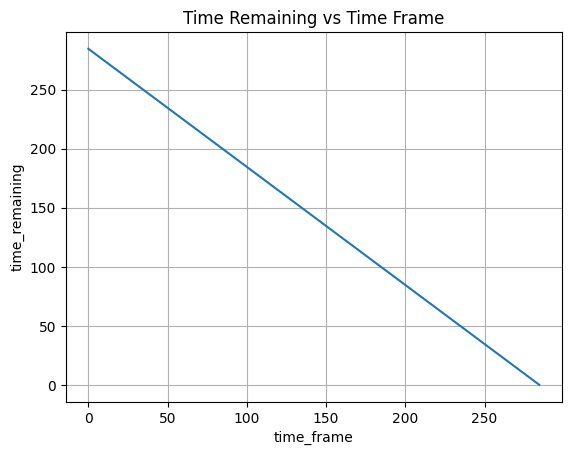

In [1]:
import pandas as pd
df= pd.read_csv("final_df.csv")
import matplotlib.pyplot as plt

plt.plot(df['time_frame'], df['time_remaining'])
plt.title("Time Remaining vs Time Frame")
plt.xlabel("time_frame")
plt.ylabel("time_remaining")
plt.grid()
plt.show()



In [6]:

import cv2
import os

video_path = 'videoplayback_normal_speed.mp4'
output_dir = 'FRAMENEW'
interval = 0.1  # seconds
start_time = 15.0  # seconds

abs_output_dir = os.path.abspath(output_dir)
print(f"Frames will be saved in: {abs_output_dir}")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print('Error: Cannot open video file.')
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    video_duration = frame_count / fps if fps > 0 else 0
    t = start_time
    while t <= video_duration:
        frame_number = int(t * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        if ret:
            frame_filename = os.path.join(output_dir, f'frame_{t:.1f}s.jpg')
            cv2.imwrite(frame_filename, frame)
            print(f'Saved {frame_filename}')
        else:
            print(f'Could not extract frame at {t:.1f}s')
        t += interval
    cap.release()


Frames will be saved in: c:\Users\lenovo\Desktop\initial\FRAMENEW
Saved FRAMENEW\frame_15.0s.jpg
Saved FRAMENEW\frame_15.1s.jpg
Saved FRAMENEW\frame_15.2s.jpg
Saved FRAMENEW\frame_15.3s.jpg
Saved FRAMENEW\frame_15.4s.jpg
Saved FRAMENEW\frame_15.5s.jpg
Saved FRAMENEW\frame_15.6s.jpg
Saved FRAMENEW\frame_15.7s.jpg
Saved FRAMENEW\frame_15.8s.jpg
Saved FRAMENEW\frame_15.9s.jpg
Saved FRAMENEW\frame_16.0s.jpg
Saved FRAMENEW\frame_16.1s.jpg
Saved FRAMENEW\frame_16.2s.jpg
Saved FRAMENEW\frame_16.3s.jpg
Saved FRAMENEW\frame_16.4s.jpg
Saved FRAMENEW\frame_16.5s.jpg
Saved FRAMENEW\frame_16.6s.jpg
Saved FRAMENEW\frame_16.7s.jpg
Saved FRAMENEW\frame_16.8s.jpg
Saved FRAMENEW\frame_16.9s.jpg
Saved FRAMENEW\frame_17.0s.jpg
Saved FRAMENEW\frame_17.1s.jpg
Saved FRAMENEW\frame_17.2s.jpg
Saved FRAMENEW\frame_17.3s.jpg
Saved FRAMENEW\frame_17.4s.jpg
Saved FRAMENEW\frame_17.5s.jpg
Saved FRAMENEW\frame_17.6s.jpg
Saved FRAMENEW\frame_17.7s.jpg
Saved FRAMENEW\frame_17.8s.jpg
Saved FRAMENEW\frame_17.9s.jpg
Save

In [9]:

import cv2
import os
import glob
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as T
from torchvision.models import resnet18

# CNN model setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet18(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval().to(device)
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_features(img):
    # CNN embedding
    img_t = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = resnet(img_t).cpu().numpy().flatten()
    # Color histogram (RGB, 32 bins each)
    hist = []
    for i in range(3):
        h = cv2.calcHist([img], [i], None, [32], [0, 256]).flatten()
        h = h / h.sum()
        hist.extend(h)
    # Edge/texture (Sobel)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edge_mean = np.mean(np.abs(sobelx)) + np.mean(np.abs(sobely))
    return embedding, hist, edge_mean

frame_dir = 'FRAMENEW'
frame_files = sorted(glob.glob(os.path.join(frame_dir, 'frame_*.jpg')), key=lambda x: float(os.path.basename(x).split('_')[1][:-5]))
total_time = 299.6 - 15.0  # seconds

data = []
for frame_path in frame_files:
    basename = os.path.basename(frame_path)
    # Extract time from filename (e.g., frame_17.0s.jpg)
    time_frame = float(basename.split('_')[1][:-5])
    if time_frame < 15:
        continue  # skip frames before 15s
    rel_time = time_frame - 15
    time_remaining = total_time - rel_time
    img = cv2.imread(frame_path)
    embedding, hist, edge_mean = extract_features(img)
    row = {
        'framename': basename,
        'time_frame': rel_time,
        'time_remaining': time_remaining,
        'cnn_embedding': embedding.tolist(),
        'hist_rgb': hist,
        'edge_texture': edge_mean
    }
    data.append(row)

dfnew = pd.DataFrame(data)
dfnew.to_csv('dfnew.csv', index=False)
dfnew.head()



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture
0,frame_15.0s.jpg,0.0,284.6,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221
1,frame_15.1s.jpg,0.1,284.5,"[0.05830049514770508, 0.0, 1.8629369735717773,...","[0.24937175, 0.00060546875, 2.2786458e-05, 0.0...",89.843242
2,frame_15.2s.jpg,0.2,284.4,"[0.11964540928602219, 0.0, 2.1577231884002686,...","[0.24966797, 0.00033203125, 0.0, 0.0006445313,...",97.548268
3,frame_15.3s.jpg,0.3,284.3,"[0.24540159106254578, 0.0, 2.2907207012176514,...","[0.24978516, 0.00018880208, 2.6041667e-05, 0.0...",102.737018
4,frame_15.4s.jpg,0.4,284.2,"[0.21674494445323944, 0.0, 2.2096481323242188,...","[0.2497819, 0.0001920573, 2.6041667e-05, 0.000...",106.981465


In [10]:
dfnew

,framename,time_frame,time_remaining,cnn_embedding,hist_rgb,edge_texture
0,frame_15.0s.jpg,0.0,284.6,"[0.10480467975139618, 0.0, 1.6664959192276, 0....","[0.24923177, 0.0006445313, 0.0001953125, 0.007...",85.950221
1,frame_15.1s.jpg,0.1,284.5,"[0.05830049514770508, 0.0, 1.8629369735717773,...","[0.24937175, 0.00060546875, 2.2786458e-05, 0.0...",89.843242
2,frame_15.2s.jpg,0.2,284.4,"[0.11964540928602219, 0.0, 2.1577231884002686,...","[0.24966797, 0.00033203125, 0.0, 0.0006445313,...",97.548268
3,frame_15.3s.jpg,0.3,284.3,"[0.24540159106254578, 0.0, 2.2907207012176514,...","[0.24978516, 0.00018880208, 2.6041667e-05, 0.0...",102.737018
4,frame_15.4s.jpg,0.4,284.2,"[0.21674494445323944, 0.0, 2.2096481323242188,...","[0.2497819, 0.0001920573, 2.6041667e-05, 0.000...",106.981465
...,...,...,...,...,...,...
2842,frame_299.2s.jpg,284.2,0.4,"[1.8727436065673828, 0.11569907516241074, 1.65...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",285.995807
2843,frame_299.3s.jpg,284.3,0.3,"[1.8344308137893677, 0.05562863126397133, 1.50...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",287.285749
2844,frame_299.4s.jpg,284.4,0.2,"[1.8801840543746948, 0.08217769116163254, 1.72...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",286.820521
2845,frame_299.5s.jpg,284.5,0.1,"[1.8062819242477417, 0.05273587256669998, 2.03...","[0.24966797, 0.00033203125, 0.0, 0.0, 0.0, 0.0...",286.962715


In [13]:
type(dfnew['cnn_embedding'][0][0])

# Parse stringified vectors



float

In [14]:
def combine_features(row):
    return np.array(row['cnn_embedding'] + row['hist_rgb'] + [row['edge_texture']])

dfnew['combined_features'] = dfnew.apply(combine_features, axis=1)


In [15]:
sequence_length = 5
X, y = [], []

for i in range(len(df) - sequence_length + 1):
    seq = dfnew['combined_features'].iloc[i:i+sequence_length].to_list()
    target = dfnew['time_remaining'].iloc[i+sequence_length - 1]
    X.append(seq)
    y.append(target)

X = np.array(X)  # shape: (num_samples, 5, 609)
y = np.array(y)  # shape: (num_samples,)


In [24]:
X.shape

(2843, 5, 609)

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

class LSTMRegressor(nn.Module):
    def __init__(self, input_dim=609, hidden_dim=256, num_layers=2):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)  # (B, T, H)
        return self.fc(out[:, -1, :])  # last time step output


In [17]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
train_ds, val_ds = random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)


In [18]:
model = LSTMRegressor()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}")


Epoch 1, Train Loss: 22556.2791
Epoch 2, Train Loss: 18000.6188
Epoch 3, Train Loss: 14817.6585
Epoch 4, Train Loss: 12592.0814
Epoch 5, Train Loss: 10536.8045
Epoch 6, Train Loss: 9313.9609
Epoch 7, Train Loss: 8321.4111
Epoch 8, Train Loss: 7729.4148
Epoch 9, Train Loss: 7484.0017
Epoch 10, Train Loss: 7163.8502


In [20]:
model.eval()
with torch.no_grad():
    val_preds = []
    val_targets = []
    for xb, yb in val_loader:
        pred = model(xb)
        val_preds.extend(pred.squeeze().numpy())
        val_targets.extend(yb.squeeze().numpy())

from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 81.75


In [21]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# val_targets and val_preds should be your true and predicted values

r2 = r2_score(val_targets, val_preds)

print(f"Validation R²: {r2:.4f}")


Validation R²: -0.0500


In [23]:
len(X)

2843